In [4]:
from sigpy.mri import spiral
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
help(spiral)

Help on function spiral in module sigpy.mri.samp:

spiral(fov, N, f_sampling, R, ninterleaves, alpha, gm, sm, gamma=267800000.0)
    Generate variable density spiral trajectory.
    
    Args:
        fov (float): field of view in meters.
        N (int): effective matrix shape.
        f_sampling (float): undersampling factor in freq encoding direction.
        R (float): undersampling factor.
        ninterleaves (int): number of spiral interleaves
        alpha (float): variable density factor
        gm (float): maximum gradient amplitude (T/m)
        sm (float): maximum slew rate (T/m/s)
        gamma (float): gyromagnetic ratio in rad/T/s
    
    Returns:
        array: spiral coordinates.
    
    References:
        Dong-hyun Kim, Elfar Adalsteinsson, and Daniel M. Spielman.
        'Simple Analytic Variable Density Spiral Design.' MRM 2003.



In [164]:
gm = 80*10**-3
sm = 200
alpha=4
k_max=2*np.pi
N=256
fov = N/k_max
ninterleaves = 1
R = 7
f_sampling=2


In [165]:
lambd = k_max/2
w=2*np.pi*ninterleaves

In [166]:
Tea = 267800000*gm/(lambd*w)*(alpha+1)

In [167]:
Tea

5426762.595883612

In [168]:
test=spiral(fov, N, f_sampling, R, ninterleaves, alpha, gm, sm)

0.0011488930917446297


In [169]:
test.shape

(489, 2)

In [170]:
547*8

4376

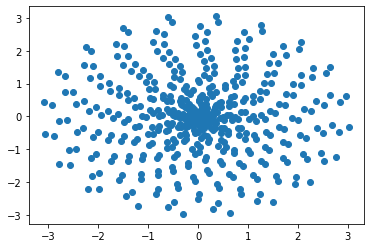

In [171]:
plt.scatter(x=test[:,0],y=test[:,1])

In [1]:
test_rotated = 

NameError: name 'test' is not defined

In [2]:
test.shape

NameError: name 'test' is not defined

In [3]:
fov

NameError: name 'fov' is not defined